<a href="https://colab.research.google.com/github/gloriapintado/Breast-Cancer-Prediction/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Prediction by Images Classification

### Overview

“Accurate Diagnosis Health” clinic health in the city of Mexico DF just found out that a good amount of their patients who have breast cancer are female patients who come from rural zones. To make it easier for them ‘AD Health’ is putting up small local where screening diagnoses are taken and are being developed on an automated tool for preliminary analysis in breast cancer by allowing quicker identification and referrals of potential cases for better evaluation.


### Data Source

I found a dataset in Kaggle named “Multi Cancer Dataset” which contains many images of different types of cancers such as Acute Lymphoblastic Leukemia, Brain Cancer, Breast Cancer, Cervical Cancer, Kidney Cancer, Lung, Colon Cancer, Lymphoma, and Oral Cancer. However, I will be focusing on Breast Cancer since “AD Health” main goal is to determine by screening diagnosis if they have breast cancer or not.


The data set already has 10,000 images where 5000 of them are diagnosed with malignant and the other 5000 are benign meaning they are noncancerous. Making this a binary classification, target being if they have breast benign or breast malignant.

In [1]:
import cv2
import os
import random
import shutil
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input, Activation, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
from PIL import Image
from keras.utils import normalize
from tensorflow.keras.layers import Lambda

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
directory_path = '/content/drive/MyDrive/Breast Cancer/'
os.listdir(directory_path)

['breast_benign', 'breast_malignant', '.ipynb_checkpoints']

In [5]:
# Define the image directory and size
image_directory = '/content/drive/MyDrive/Breast Cancer/'
SIZE = 150
dataset = []
label = []


In [6]:
breast_malignant_images = os.listdir(image_directory + 'breast_malignant/')
for i, image_name in enumerate(breast_malignant_images):

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'breast_malignant/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

breast_benign_images = os.listdir(image_directory + 'breast_benign/')
for i, image_name in enumerate(breast_benign_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'breast_benign/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
dataset = np.array(dataset)
label = np.array(label)

In [8]:
dataset.shape

(10000, 200, 200, 3)

In [9]:
label.shape

(10000,)

# Exploring Data set

### An image of breast benign

Label for this breast image is:  1


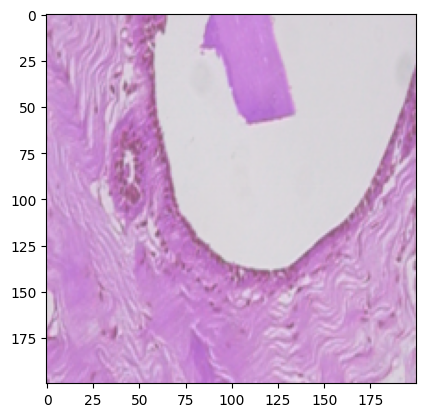

In [10]:
image_number = random.randint(0, len(dataset))
plt.imshow(np.reshape(dataset[image_number], (200, 200, 3)))
print("Label for this breast image is: ", label[image_number])

### An image of breast malignant

Label for this breast image is:  0


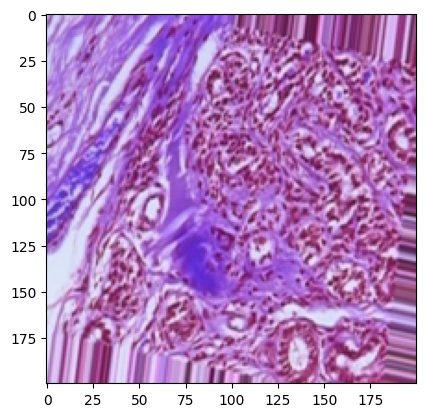

In [11]:
image_number = random.randint(0, len(dataset))
plt.imshow(np.reshape(dataset[image_number], (200, 200, 3)))
print("Label for this breast image is: ", label[image_number])

# Splitting the Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 42)

In [13]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 8000
Testing set size: 2000


In [14]:
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


In [15]:
print(X_train.shape)
print(X_test.shape)

print(X_train.dtype)
print(X_test.dtype)

(8000, 200, 200, 3)
(2000, 200, 200, 3)
uint8
uint8


In [16]:
model = Sequential()

# Normalize the input image data
model.add(Lambda(lambda x: x / 255.0, input_shape=(200, 200, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Fully-connected part of the network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        3

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/15
80/80 [==============================] - 765s 10s/step - loss: 0.5956 - accuracy: 0.7894 - val_loss: 0.3030 - val_accuracy: 0.8895
Epoch 2/15
80/80 [==============================] - 753s 9s/step - loss: 0.2682 - accuracy: 0.8924 - val_loss: 0.2350 - val_accuracy: 0.9060
Epoch 3/15
80/80 [==============================] - 765s 10s/step - loss: 0.2641 - accuracy: 0.8965 - val_loss: 0.2181 - val_accuracy: 0.9085
Epoch 4/15
80/80 [==============================] - 745s 9s/step - loss: 0.2171 - accuracy: 0.9122 - val_loss: 0.2471 - val_accuracy: 0.8995
Epoch 5/15
80/80 [==============================] - 750s 9s/step - loss: 0.1826 - accuracy: 0.9296 - val_loss: 0.2138 - val_accuracy: 0.9185
Epoch 6/15
80/80 [==============================] - 749s 9s/step - loss: 0.1740 - accuracy: 0.9379 - val_loss: 0.1947 - val_accuracy: 0.9225
Epoch 7/15
80/80 [==============================] - 726s 9s/step - loss: 0.1568 - accuracy: 0.9427 - val_loss: 0.2124 - val_accuracy: 0.9185
Epoch 8/15


In [20]:
model.save('saved_basemodel.h5')

In [22]:
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = history.history['val_accuracy'][best_val_acc_epoch - 1]

print(f"Best validation accuracy is {best_val_acc} at epoch {best_val_acc_epoch}.")

Best validation accuracy is 0.940500020980835 at epoch 8.


In [26]:
predictions = model.predict(X_test)

63/63 [==============================] - 48s 753ms/step


In [27]:
evaluation = model.evaluate(X_test, y_test)

63/63 [==============================] - 48s 740ms/step - loss: 0.2553 - accuracy: 0.9330
